In [16]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from Helpers import helpers

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)

In [17]:
import numpy as np


colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [40]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_2d_cluster(X, model, columns = ['X', 'Y']):
    means = model.cluster_centers_ if 'cluster_centers_' in dir(model) else model.labels_
    ax = sns.scatterplot(X[columns[0]], X[columns[1]], c=vectorizer(model.labels_))
    ax = sns.scatterplot(means[:, 0], means[:, 1], ec='red', legend=False, ax=ax)
    plt.show()

In [19]:
diabeters_dataset = helpers.load_dataset('./data/ObesityDataSet_raw_and_data_sinthetic.csv')
diabeters_dataset

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [20]:
diabeters_dataset_numeric = diabeters_dataset.select_dtypes(include=['float64', 'int64'])
columns_for_evaluation = ['Age', 'Height', 'Weight']
columns_for_evaluation_2d = ['Height', 'Weight']
diabeters_dataset_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     2111 non-null   float64
 1   Height  2111 non-null   float64
 2   Weight  2111 non-null   float64
 3   FCVC    2111 non-null   float64
 4   NCP     2111 non-null   float64
 5   CH2O    2111 non-null   float64
 6   FAF     2111 non-null   float64
 7   TUE     2111 non-null   float64
dtypes: float64(8)
memory usage: 132.1 KB


In [21]:
import pandas as pd
from sklearn.discriminant_analysis import StandardScaler


diabeters_evaluation = diabeters_dataset_numeric[columns_for_evaluation]
diabeters_evaluation_scaled = pd.DataFrame(StandardScaler().fit_transform(diabeters_evaluation), columns = diabeters_evaluation.columns)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff3c2e40d0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff3c2e40d0>
Traceback 

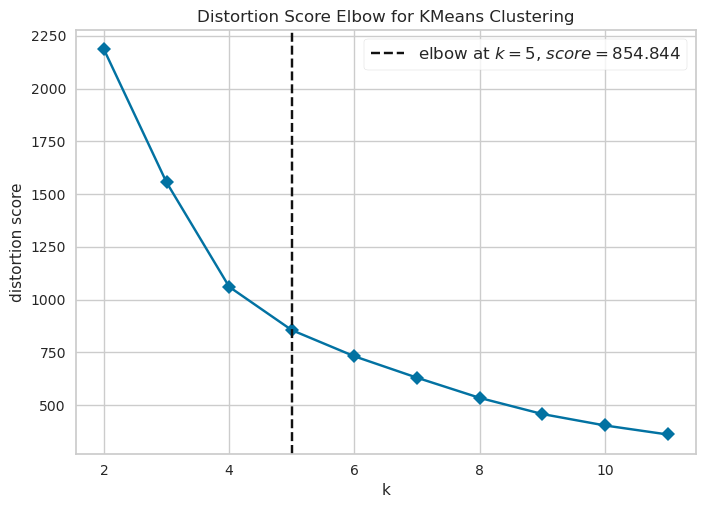

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [22]:
visualizer.fit(diabeters_evaluation_scaled[columns_for_evaluation_2d])      # Fit the data to the visualizer
visualizer.show()

In [31]:
model = KMeans(n_clusters=visualizer.elbow_value_, init='random', algorithm='lloyd')
model.fit(diabeters_evaluation_scaled[columns_for_evaluation_2d])
model.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff881450d0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff881450d0>
Traceback 

array([2, 2, 0, ..., 4, 4, 4], dtype=int32)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


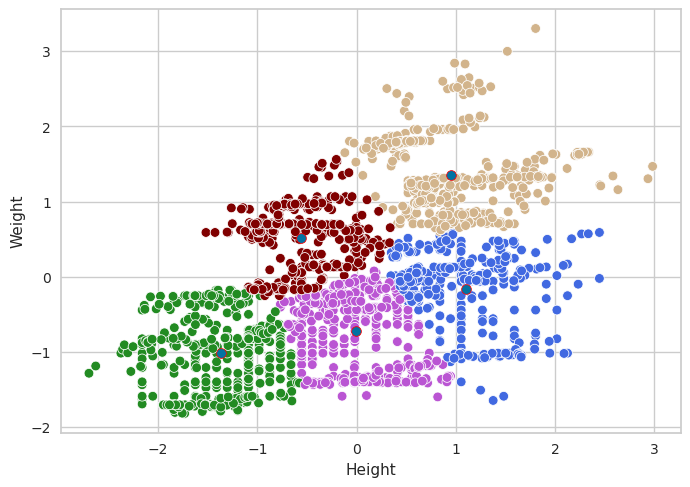

In [32]:
plot_2d_cluster(diabeters_evaluation_scaled, model, columns=columns_for_evaluation_2d)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff1dd2a3a0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff1dd2a3a0>
Traceback 

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=11), k=(2, 12),
                 timings=False)

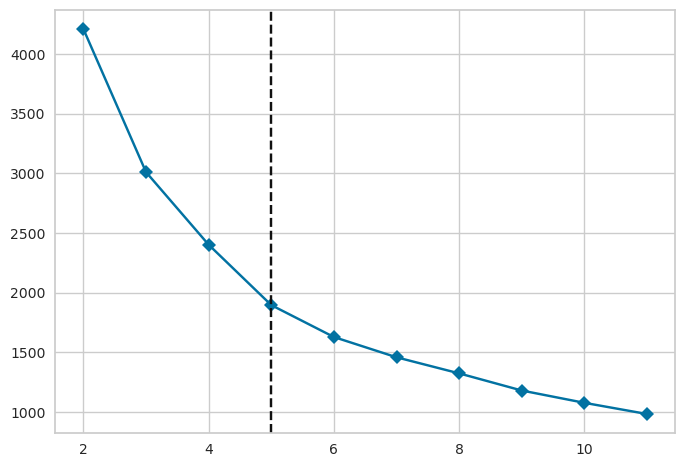

In [25]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,12), timings=False)
visualizer.fit(diabeters_evaluation_scaled)  

In [26]:
model = KMeans(n_clusters=visualizer.elbow_value_, init='random', algorithm='lloyd')
model.fit(diabeters_evaluation_scaled)
model.labels_

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff3e6464c0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff3e6464c0>
Traceback 

array([2, 2, 3, ..., 4, 4, 4], dtype=int32)

## DBSCAN

In [27]:
from Helpers import helpers

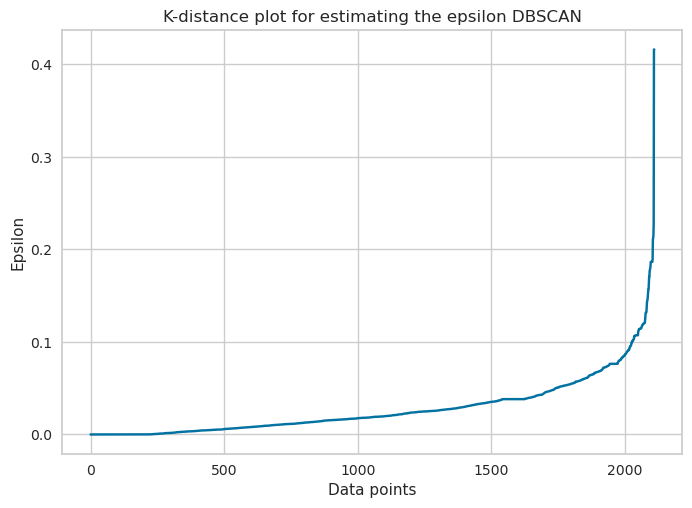

In [33]:
helpers.kDistancePlot(diabeters_evaluation_scaled[columns_for_evaluation_2d])

In [45]:
eps = 0.1

In [53]:
from sklearn.cluster import DBSCAN


model = DBSCAN(eps=eps, min_samples=4, metric='euclidean')
model.fit(diabeters_evaluation_scaled[columns_for_evaluation_2d])

DBSCAN(eps=0.3, min_samples=4)

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

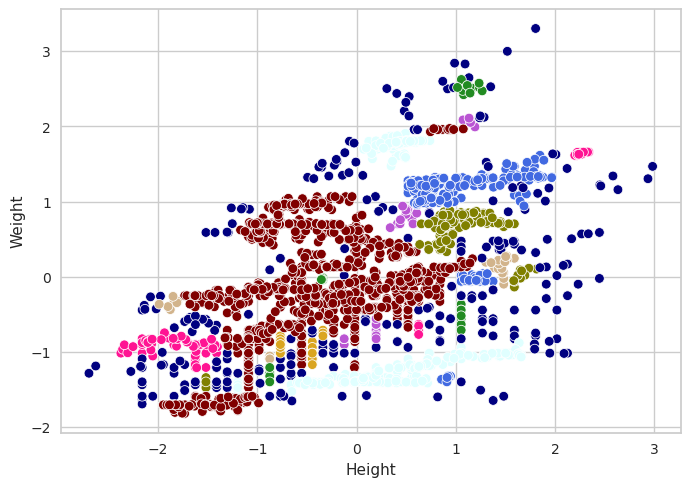

In [47]:
plot_2d_cluster(diabeters_evaluation_scaled, model, columns=columns_for_evaluation_2d)

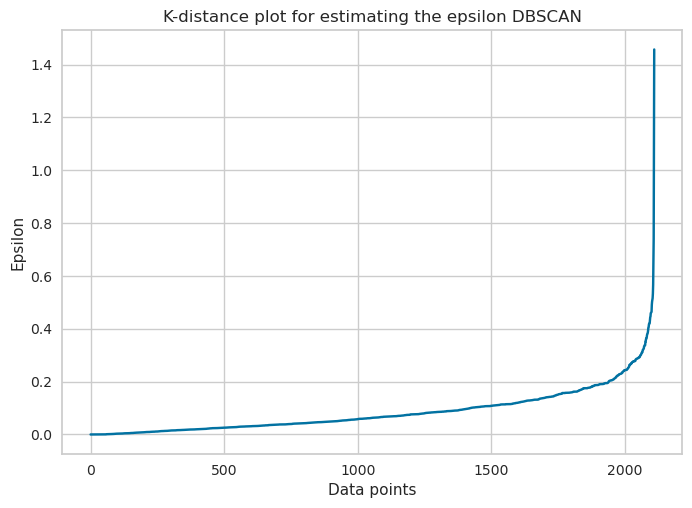

In [48]:
helpers.kDistancePlot(diabeters_evaluation_scaled)

In [54]:
eps = 0.3

model = DBSCAN(eps=eps, min_samples=4, metric='euclidean')
model.fit(diabeters_evaluation_scaled)

DBSCAN(eps=0.3, min_samples=4)

In [52]:
model.labels_

array([ 0,  0, -1, ...,  0,  0,  0])

## Affinity propagation

In [55]:
from sklearn.cluster import AffinityPropagation


ap = AffinityPropagation(damping=0.5, affinity='euclidean')
ap.fit(diabeters_evaluation_scaled[columns_for_evaluation_2d])

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


AffinityPropagation()

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


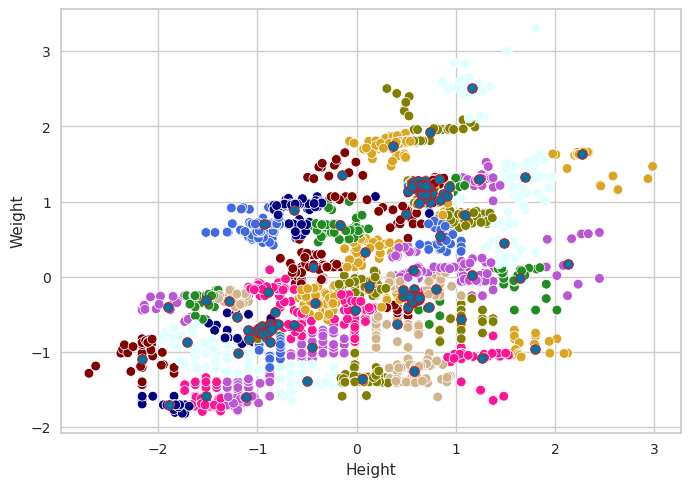

In [56]:
plot_2d_cluster(diabeters_evaluation_scaled, ap, columns=columns_for_evaluation_2d)

In [57]:

ap = AffinityPropagation(damping=0.5, affinity='euclidean')
ap.fit(diabeters_evaluation_scaled)

/opt/conda/lib/python3.9/site-packages/sklearn/cluster/_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


AffinityPropagation()

Parameters:
- affinity propagation: damping=0.5, affinity='euclidean'
- k-means: n_clusters=5, init='random' algorithm: lloyd (both 2d and 3d)
- dbscan: eps=0.3, min_samples=6, metric='euclidean' for 3d
- dbscan2d: eps=0.1, min_samples=4, metric='euclidean' for 2d